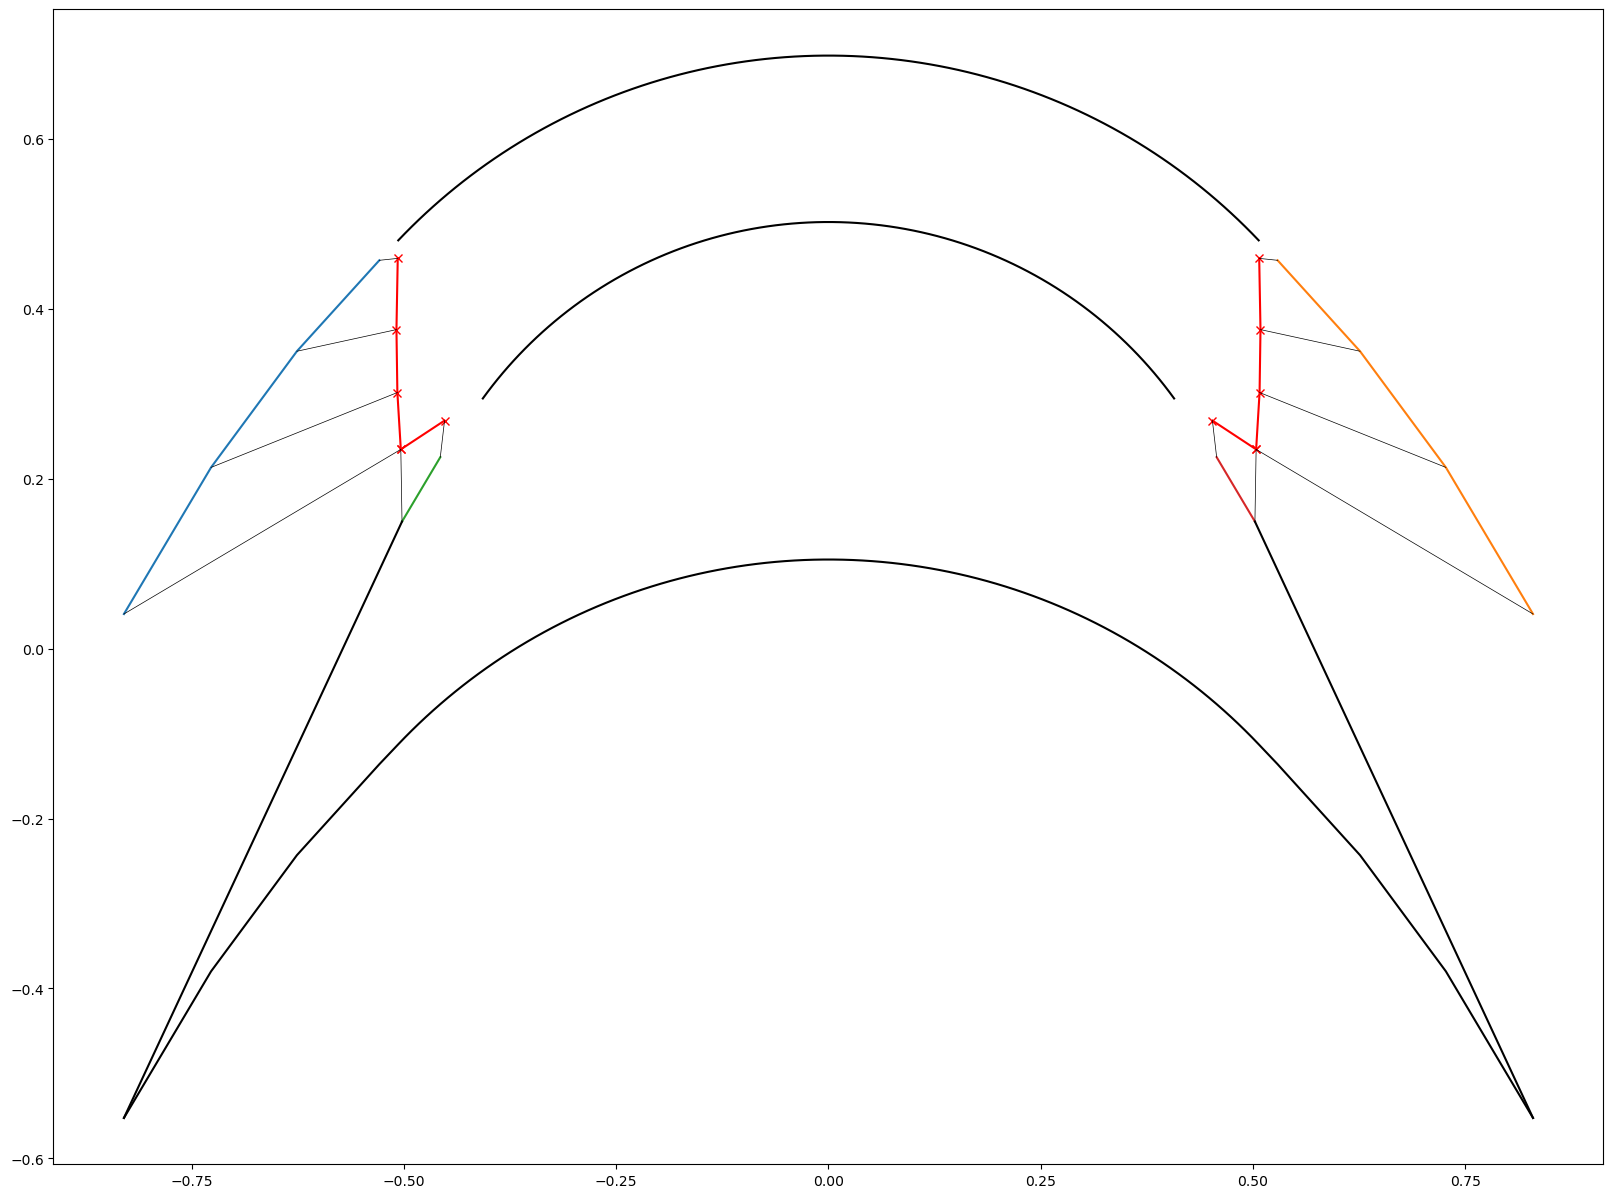

In [23]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Specific heat ratio
gamma = 1.17

# Function to calculate M* (Mach number)
def Mstar(M):
    return np.sqrt(((gamma + 1) / 2 * M**2) / (1 + (gamma - 1) / 2 * M**2))

# Function to calculate Prandtl-Meyer function
def nu(M):
    return (np.pi / 4 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) + 
            0.5 * (np.sqrt((gamma + 1)/(gamma - 1)) * np.arcsin((gamma - 1) * Mstar(M)**2 - gamma) + 
            np.arcsin((gamma + 1)/Mstar(M)**2 - gamma)))

# Initial Mach numbers
Mach_inlet = 2
Mach_outlet = Mach_inlet
Mach_lower = 1.5
Mach_upper = 2.3

# Calculate Prandtl-Meyer function values for given Mach numbers
nu_inlet = nu(Mach_inlet)
nu_outlet = nu(Mach_outlet)
nu_lower = nu(Mach_lower)
nu_upper = nu(Mach_upper)

# Blade angles in radians
beta_inlet = np.deg2rad(65)
beta_outlet = -beta_inlet

# Calculate flow angles
alpha_lower_inlet = beta_inlet - (nu_inlet - nu_lower)
alpha_lower_outlet = beta_outlet - (nu_outlet - nu_lower)
alpha_upper_inlet = beta_inlet - (nu_upper - nu_inlet)
alpha_upper_outlet = beta_outlet - (nu_upper - nu_outlet)

# Function to calculate u_i
u_i = lambda Rstar: -np.arcsin(np.sqrt(0.5*(gamma+1)*Rstar**2 - 0.5*(gamma-1)))

# Initial conditions for lower flow
phi_k1 = 0
Rlk1 = 1 / Mstar(Mach_lower)
u_i_k1 = u_i(Rlk1)

ylstar_k1 = Rlk1
xlstar_k1 = 0

# Lists to store coordinates
x_lower_flow = []
y_lower_flow = []
x_lower_flow_k = []
y_lower_flow_k = []

# Step size for iteration
dv = 0.1

# Safe arcsin function to avoid domain errors
def safe_asin(x):
    return np.arcsin(np.clip(x, -1, 1))

# Iterate to calculate lower flow coordinates
for k in range(int((nu_inlet - nu_lower)/dv + 1), 0, -1):
    phi_k = nu_inlet - nu_lower - (k-1) * dv
    fRkstar = 2 * nu_inlet - np.pi / 2 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) - 2 * (k - 1) * dv
    f = lambda Rstar: (np.sqrt((gamma + 1)/(gamma - 1)) * safe_asin((gamma - 1)/ Rstar**2 - gamma) + safe_asin((gamma + 1) * Rstar**2 - gamma) - fRkstar)
    Rstar = fsolve(f, 0.9)[0]
    xkstar = -Rstar * np.sin(phi_k)
    ykstar = Rstar * np.cos(phi_k)

    u_i_k = u_i(Rstar)
    mi_k = np.tan(0.5 * (phi_k + phi_k1) + 0.5 * (u_i_k + u_i_k1))
    mbar_k = np.tan(phi_k1)
    xstar_l = ((ylstar_k1 - mbar_k * xlstar_k1) - (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)
    ystar_l =  (mi_k *(ylstar_k1 - mbar_k * xlstar_k1) - mbar_k * (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)

    phi_k1 = phi_k
    u_i_k1 = u_i_k
    xlstar_k1 = xstar_l
    ylstar_k1 = ystar_l

    x_lower_flow.append(xstar_l * np.cos(alpha_lower_inlet) - ystar_l * np.sin(alpha_lower_inlet))
    y_lower_flow.append(xstar_l * np.sin(alpha_lower_inlet) + ystar_l * np.cos(alpha_lower_inlet))
    x_lower_flow_k.append(xkstar * np.cos(alpha_lower_inlet) - ykstar * np.sin(alpha_lower_inlet))
    y_lower_flow_k.append(ykstar * np.cos(alpha_lower_inlet) + xkstar * np.sin(alpha_lower_inlet))

# Function to calculate u_i for upper flow
u_i = lambda Rstar: np.arcsin(np.sqrt(0.5*(gamma+1)*Rstar**2 - 0.5*(gamma-1)))

# Initial conditions for upper flow
phi_k1 = 0
Rlk1 = 1 / Mstar(Mach_upper)
u_i_k1 = u_i(Rlk1)

ylstar_k1 = Rlk1
xlstar_k1 = 0

# Lists to store coordinates for upper flow
x_upper_flow = []
y_upper_flow = []
x_upper_flow_k = []
y_upper_flow_k = []

# Iterate to calculate upper flow coordinates
for k in range(int((nu_upper - nu_inlet)/dv + 1), 0, -1):
    phi_k = nu_upper - nu_inlet - (k-1) * dv
    fRkstar = 2 * nu_inlet - np.pi / 2 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) + 2 * (k - 1) * dv
    f = lambda Rstar: (np.sqrt((gamma + 1)/(gamma - 1)) * safe_asin((gamma - 1)/ Rstar**2 - gamma) + safe_asin((gamma + 1) * Rstar**2 - gamma) - fRkstar)
    Rstar = fsolve(f, 0.9)[0]
    xkstar = -Rstar * np.sin(phi_k)
    ykstar = Rstar * np.cos(phi_k)

    u_i_k = u_i(Rstar)
    mi_k = np.tan(0.5 * (phi_k + phi_k1) + 0.5 * (u_i_k + u_i_k1))
    mbar_k = np.tan(phi_k1)
    xstar_l = ((ylstar_k1 - mbar_k * xlstar_k1) - (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)
    ystar_l =  (mi_k *(ylstar_k1 - mbar_k * xlstar_k1) - mbar_k * (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)

    phi_k1 = phi_k
    u_i_k1 = u_i_k
    xlstar_k1 = xstar_l
    ylstar_k1 = ystar_l

    x_upper_flow.append(xstar_l * np.cos(alpha_upper_inlet) - ystar_l * np.sin(alpha_upper_inlet))
    y_upper_flow.append(xstar_l * np.sin(alpha_upper_inlet) + ystar_l * np.cos(alpha_upper_inlet))
    x_upper_flow_k.append(xkstar * np.cos(alpha_upper_inlet) - ykstar * np.sin(alpha_upper_inlet))
    y_upper_flow_k.append(ykstar * np.cos(alpha_upper_inlet) + xkstar * np.sin(alpha_upper_inlet))

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(x_lower_flow, y_lower_flow, '-')
plt.plot(-np.array(x_lower_flow), y_lower_flow, '-')
plt.plot(np.array(x_upper_flow), y_upper_flow, '-')
plt.plot(-np.array(x_upper_flow), y_upper_flow, '-')

plt.plot(x_lower_flow_k, y_lower_flow_k, 'x-', color='red')
plt.plot(-np.array(x_lower_flow_k), y_lower_flow_k, 'x-', color='red')
plt.plot(np.array(x_upper_flow_k), y_upper_flow_k, 'x-', color='red')
plt.plot(-np.array(x_upper_flow_k), y_upper_flow_k, 'x-', color='red')

for i in range(int((nu_inlet - nu_lower)/dv + 1), 0, -1):
    plt.plot([x_lower_flow[i-1], x_lower_flow_k[i-1]], [y_lower_flow[i-1], y_lower_flow_k[i-1]], 'k-', linewidth=0.5)
    plt.plot([-x_lower_flow[i-1], -x_lower_flow_k[i-1]], [y_lower_flow[i-1], y_lower_flow_k[i-1]], 'k-', linewidth=0.5)
for i in range(int((nu_upper - nu_inlet)/dv + 1), 0, -1):
    plt.plot([x_upper_flow[i-1], x_upper_flow_k[i-1]], [y_upper_flow[i-1], y_upper_flow_k[i-1]], 'k-', linewidth=0.5)
    plt.plot([-x_upper_flow[i-1], -x_upper_flow_k[i-1]], [y_upper_flow[i-1], y_upper_flow_k[i-1]], 'k-', linewidth=0.5)
plt.axis('equal')

Rl = 1 / Mstar(Mach_lower)
Ru = 1 / Mstar(Mach_upper)

plt.plot(Rl * np.cos(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), Rl * np.sin(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), 'k-')
plt.plot(Ru * np.cos(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), Ru * np.sin(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), 'k-')
plt.plot([x_upper_flow[-1], x_lower_flow[-1]], [y_upper_flow[-1], y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)], 'k-')
plt.plot([-x_upper_flow[-1], -x_lower_flow[-1]], [y_upper_flow[-1], y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)], 'k-')

plt.plot(np.concatenate([np.flip(np.array(x_lower_flow)), Rl * np.cos(np.linspace(np.pi/2 + alpha_lower_inlet, np.pi/2 - alpha_lower_inlet, 100)), -np.array(x_lower_flow)]), 
         np.concatenate([np.flip(np.array(y_lower_flow)), Rl * np.sin(np.linspace(np.pi/2 + alpha_lower_inlet, np.pi/2 - alpha_lower_inlet, 100)), np.array(y_lower_flow)]) - y_lower_flow[-1] + (y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)), 'k-')

plt.show()

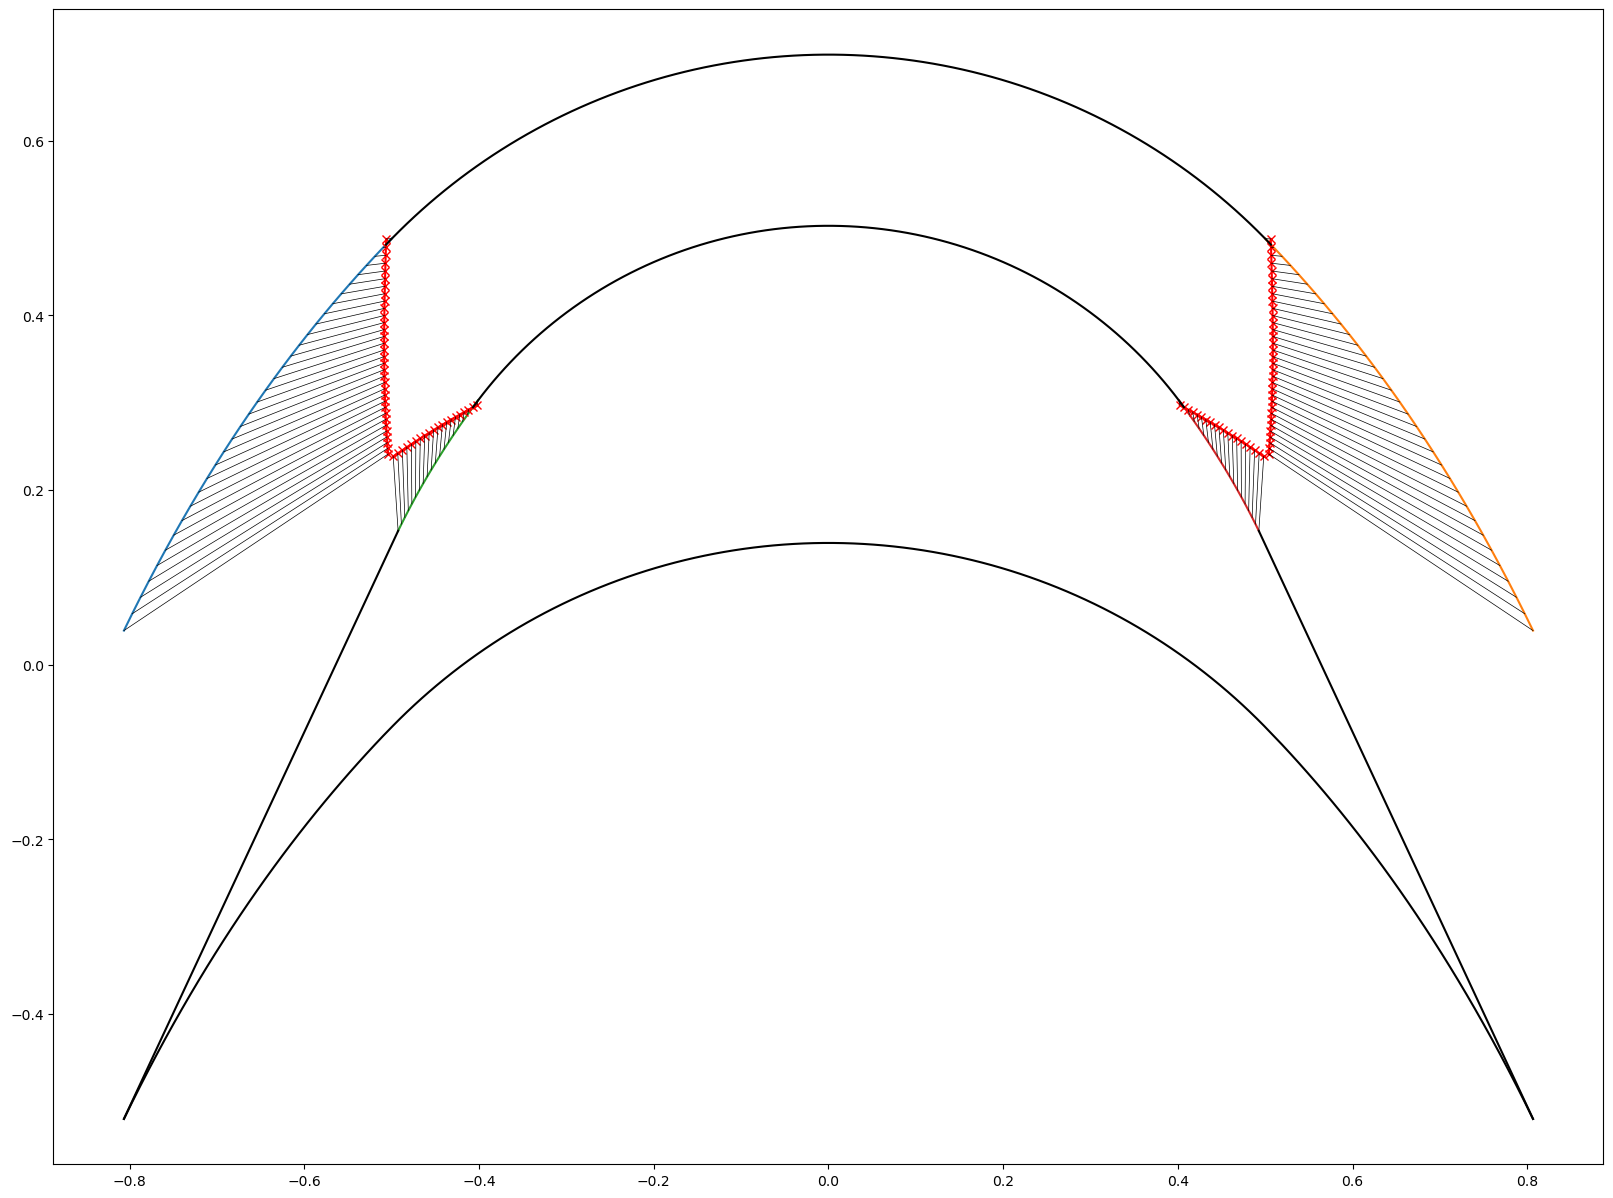

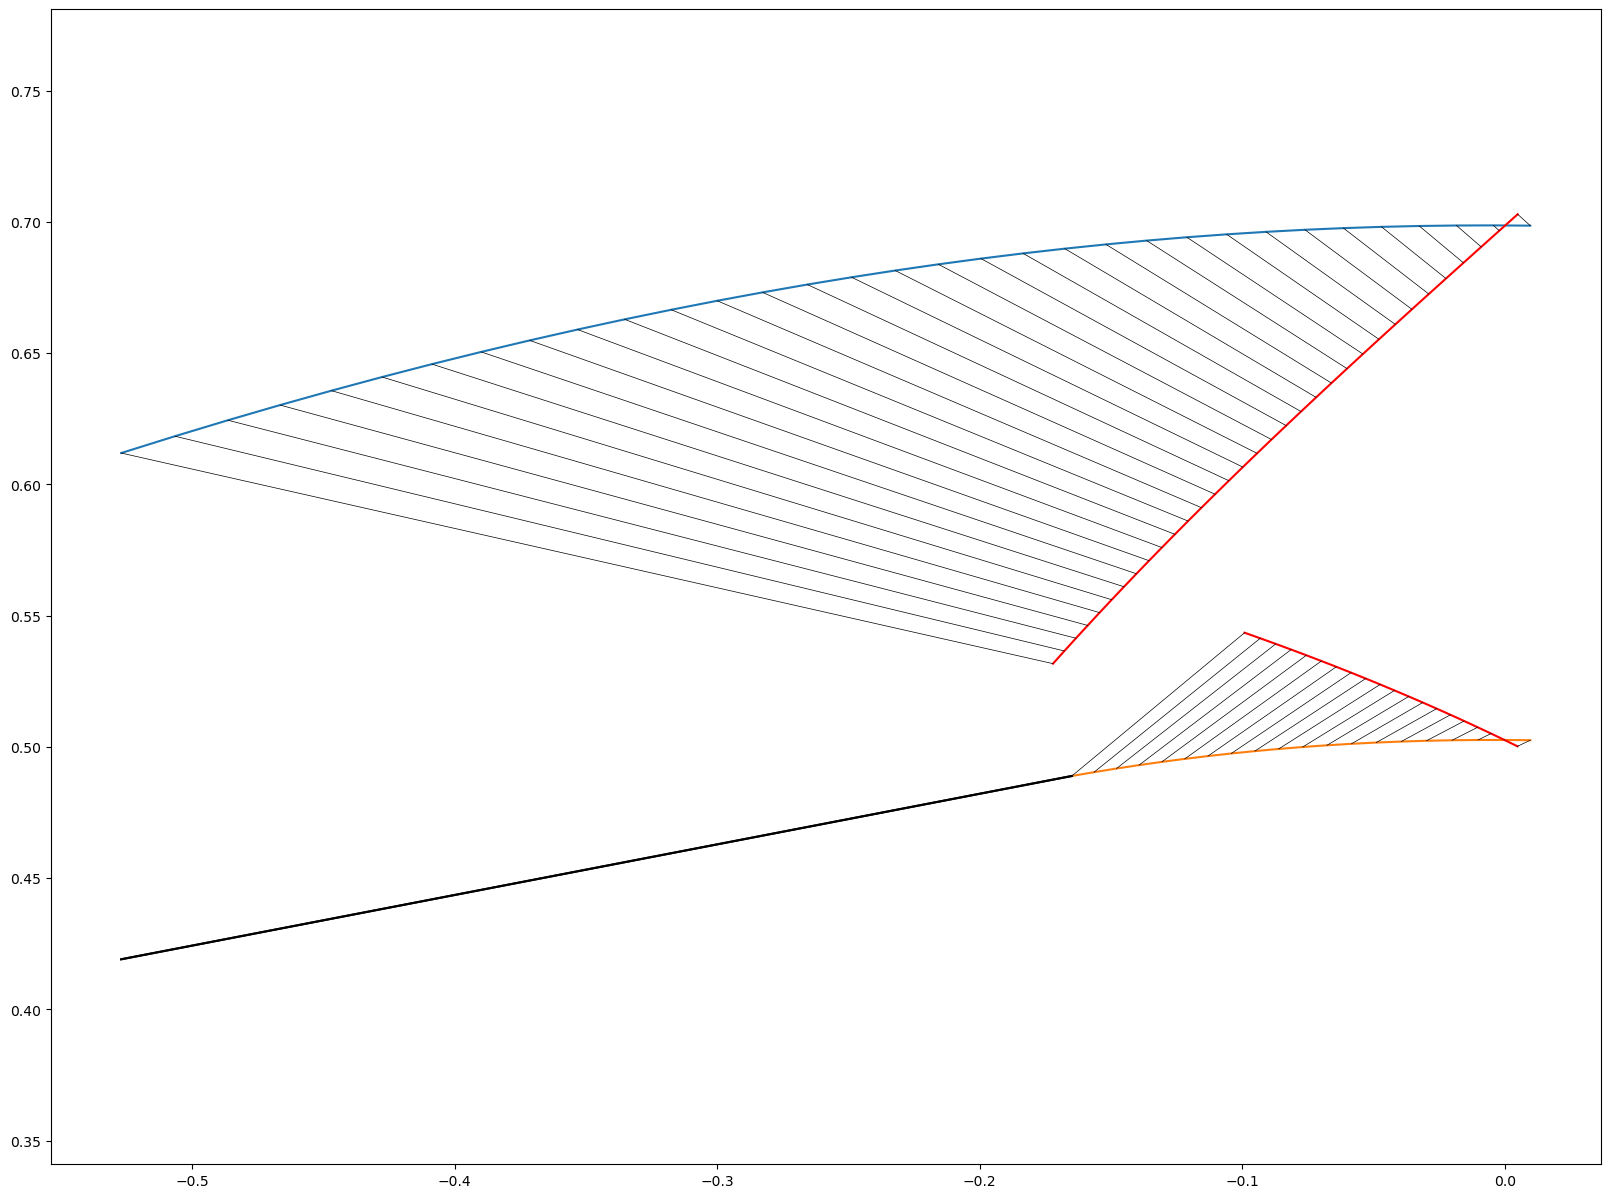

Inputs:
  Gamma:               1.17      
  Mach Inlet:          2         
  Mach Outlet:         2         
  Mach Lower:          1.5       
  Mach Upper:          2.3       
  nu_inlet:            0.5656     rad, 32.41      deg
  nu_outlet:           0.5656     rad, 32.41      deg
  nu_lower:            0.2425     rad, 13.89      deg
  nu_upper:            0.7561     rad, 43.32      deg
  Beta Inlet:          1.134      rad, 65         deg
  Beta Outlet:         -1.134     rad, -65        deg
  Alpha Lower Inlet:   0.8114     rad, 46.49      deg
  Alpha Lower Outlet:  -1.458     rad, -83.51     deg
  Alpha Upper Inlet:   0.944      rad, 54.09      deg
  Alpha Upper Outlet:  -1.325     rad, -75.91     deg
Results:
  R_lower:             0.6985    
  R_upper:             0.5026    


In [21]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Specific heat ratio
gamma = 1.17

# Function to calculate M* (Mach number)
def Mstar(M):
    return np.sqrt(((gamma + 1) / 2 * M**2) / (1 + (gamma - 1) / 2 * M**2))

# Function to calculate Prandtl-Meyer function
def nu(M):
    return (np.pi / 4 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) + 
            0.5 * (np.sqrt((gamma + 1)/(gamma - 1)) * np.arcsin((gamma - 1) * Mstar(M)**2 - gamma) + 
            np.arcsin((gamma + 1)/Mstar(M)**2 - gamma)))

# Initial Mach numbers
Mach_inlet = 2
Mach_outlet = Mach_inlet
Mach_lower = 1.5
Mach_upper = 2.3

# Calculate Prandtl-Meyer function values for given Mach numbers
nu_inlet = nu(Mach_inlet)
nu_outlet = nu(Mach_outlet)
nu_lower = nu(Mach_lower)
nu_upper = nu(Mach_upper)

# Blade angles in radians
beta_inlet = np.deg2rad(65)
beta_outlet = -beta_inlet

# Calculate flow angles
alpha_lower_inlet = beta_inlet - (nu_inlet - nu_lower)
alpha_lower_outlet = beta_outlet - (nu_outlet - nu_lower)
alpha_upper_inlet = beta_inlet - (nu_upper - nu_inlet)
alpha_upper_outlet = beta_outlet - (nu_upper - nu_outlet)

# Function to calculate u_i
u_i = lambda Rstar: -np.arcsin(np.sqrt(0.5*(gamma+1)*Rstar**2 - 0.5*(gamma-1)))

# Initial conditions for lower flow
phi_k1 = 0
Rlk1 = 1 / Mstar(Mach_lower)
u_i_k1 = u_i(Rlk1)

ylstar_k1 = Rlk1
xlstar_k1 = 0

xn_lower_flow = []
yn_lower_flow = []
xn_lower_flow_k = []
yn_lower_flow_k = []

# Lists to store coordinates
x_lower_flow = []
y_lower_flow = []
x_lower_flow_k = []
y_lower_flow_k = []

xn_upper_flow = []
yn_upper_flow = []
xn_upper_flow_k = []
yn_upper_flow_k = []

# Lists to store coordinates for upper flow
x_upper_flow = []
y_upper_flow = []
x_upper_flow_k = []
y_upper_flow_k = []

# Step size for iteration
dv = 0.01

# Safe arcsin function to avoid domain errors
def safe_asin(x):
    return np.arcsin(np.clip(x, -1, 1))

# Iterate to calculate lower flow coordinates
for k in range(int(np.ceil((nu_inlet - nu_lower)/dv)), 0, -1):
    phi_k = nu_inlet - nu_lower - (k) * dv # added one to k to fix indexing
    fRkstar = 2 * nu_inlet - np.pi / 2 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) - 2 * (k) * dv # added one to k to fix indexing
    f = lambda Rstar: (np.sqrt((gamma + 1)/(gamma - 1)) * safe_asin((gamma - 1)/ Rstar**2 - gamma) + safe_asin((gamma + 1) * Rstar**2 - gamma) - fRkstar)
    Rstar = fsolve(f, 0.9)[0]
    xkstar = -Rstar * np.sin(phi_k)
    ykstar = Rstar * np.cos(phi_k)

    u_i_k = u_i(Rstar)
    mi_k = np.tan(0.5 * (phi_k + phi_k1) + 0.5 * (u_i_k + u_i_k1))
    mbar_k = np.tan(phi_k1)
    xstar_l = ((ylstar_k1 - mbar_k * xlstar_k1) - (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)
    ystar_l =  (mi_k *(ylstar_k1 - mbar_k * xlstar_k1) - mbar_k * (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)

    phi_k1 = phi_k
    u_i_k1 = u_i_k
    xlstar_k1 = xstar_l
    ylstar_k1 = ystar_l

    x_lower_flow.append(xstar_l * np.cos(alpha_lower_inlet) - ystar_l * np.sin(alpha_lower_inlet))
    y_lower_flow.append(xstar_l * np.sin(alpha_lower_inlet) + ystar_l * np.cos(alpha_lower_inlet))
    x_lower_flow_k.append(xkstar * np.cos(alpha_lower_inlet) - ykstar * np.sin(alpha_lower_inlet))
    y_lower_flow_k.append(ykstar * np.cos(alpha_lower_inlet) + xkstar * np.sin(alpha_lower_inlet))

    xn_lower_flow.append(xstar_l)
    yn_lower_flow.append(ystar_l)
    xn_lower_flow_k.append(xkstar)
    yn_lower_flow_k.append(ykstar)

# Function to calculate u_i for upper flow
u_i = lambda Rstar: np.arcsin(np.sqrt(0.5*(gamma+1)*Rstar**2 - 0.5*(gamma-1)))

# Initial conditions for upper flow
phi_k1 = 0
Rlk1 = 1 / Mstar(Mach_upper)
u_i_k1 = u_i(Rlk1)

ylstar_k1 = Rlk1
xlstar_k1 = 0


# Iterate to calculate upper flow coordinates
for k in range(int(np.ceil((nu_upper - nu_inlet)/dv)), 0, -1):
    phi_k = nu_upper - nu_inlet - (k) * dv
    fRkstar = 2 * nu_inlet - np.pi / 2 * (np.sqrt((gamma + 1)/(gamma - 1)) - 1) + 2 * (k) * dv
    f = lambda Rstar: (np.sqrt((gamma + 1)/(gamma - 1)) * safe_asin((gamma - 1)/ Rstar**2 - gamma) + safe_asin((gamma + 1) * Rstar**2 - gamma) - fRkstar)
    Rstar = fsolve(f, 0.5)[0]
    xkstar = -Rstar * np.sin(phi_k)
    ykstar = Rstar * np.cos(phi_k)

    u_i_k = u_i(Rstar)
    mi_k = np.tan(0.5 * (phi_k + phi_k1) + 0.5 * (u_i_k + u_i_k1))
    mbar_k = np.tan(phi_k1)
    xstar_l = ((ylstar_k1 - mbar_k * xlstar_k1) - (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)
    ystar_l =  (mi_k *(ylstar_k1 - mbar_k * xlstar_k1) - mbar_k * (ykstar - mi_k * xkstar)) / (mi_k - mbar_k)

    phi_k1 = phi_k
    u_i_k1 = u_i_k
    xlstar_k1 = xstar_l
    ylstar_k1 = ystar_l

    x_upper_flow.append(xstar_l * np.cos(alpha_upper_inlet) - ystar_l * np.sin(alpha_upper_inlet))
    y_upper_flow.append(xstar_l * np.sin(alpha_upper_inlet) + ystar_l * np.cos(alpha_upper_inlet))
    x_upper_flow_k.append(xkstar * np.cos(alpha_upper_inlet) - ykstar * np.sin(alpha_upper_inlet))
    y_upper_flow_k.append(ykstar * np.cos(alpha_upper_inlet) + xkstar * np.sin(alpha_upper_inlet))

    xn_upper_flow.append(xstar_l)
    yn_upper_flow.append(ystar_l)
    xn_upper_flow_k.append(xkstar)
    yn_upper_flow_k.append(ykstar)

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(x_lower_flow, y_lower_flow, '-')
plt.plot(-np.array(x_lower_flow), y_lower_flow, '-')
plt.plot(np.array(x_upper_flow), y_upper_flow, '-')
plt.plot(-np.array(x_upper_flow), y_upper_flow, '-')

plt.plot(x_lower_flow_k, y_lower_flow_k, 'x-', color='red')
plt.plot(-np.array(x_lower_flow_k), y_lower_flow_k, 'x-', color='red')
plt.plot(np.array(x_upper_flow_k), y_upper_flow_k, 'x-', color='red')
plt.plot(-np.array(x_upper_flow_k), y_upper_flow_k, 'x-', color='red')

for i in range(int(np.ceil((nu_inlet - nu_lower)/dv)), 0, -1):
    plt.plot([x_lower_flow[i-1], x_lower_flow_k[i-1]], [y_lower_flow[i-1], y_lower_flow_k[i-1]], 'k-', linewidth=0.5)
    plt.plot([-x_lower_flow[i-1], -x_lower_flow_k[i-1]], [y_lower_flow[i-1], y_lower_flow_k[i-1]], 'k-', linewidth=0.5)
for i in range(int(np.ceil((nu_upper - nu_inlet)/dv)), 0, -1):
    plt.plot([x_upper_flow[i-1], x_upper_flow_k[i-1]], [y_upper_flow[i-1], y_upper_flow_k[i-1]], 'k-', linewidth=0.5)
    plt.plot([-x_upper_flow[i-1], -x_upper_flow_k[i-1]], [y_upper_flow[i-1], y_upper_flow_k[i-1]], 'k-', linewidth=0.5)
plt.axis('equal')

Rl = 1 / Mstar(Mach_lower)
Ru = 1 / Mstar(Mach_upper)

plt.plot(Rl * np.cos(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), Rl * np.sin(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), 'k-')
plt.plot(Ru * np.cos(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), Ru * np.sin(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), 'k-')
plt.plot([x_upper_flow[-1], x_lower_flow[-1]], [y_upper_flow[-1], y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)], 'k-')
plt.plot([-x_upper_flow[-1], -x_lower_flow[-1]], [y_upper_flow[-1], y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)], 'k-')

plt.plot(np.concatenate([np.flip(np.array(x_lower_flow)), Rl * np.cos(np.linspace(np.pi/2 + alpha_lower_inlet, np.pi/2 - alpha_lower_inlet, 100)), -np.array(x_lower_flow)]), 
         np.concatenate([np.flip(np.array(y_lower_flow)), Rl * np.sin(np.linspace(np.pi/2 + alpha_lower_inlet, np.pi/2 - alpha_lower_inlet, 100)), np.array(y_lower_flow)]) - y_lower_flow[-1] + (y_upper_flow[-1] + (x_lower_flow[-1] - x_upper_flow[-1]) * np.tan(beta_inlet)), 'k-')

plt.show()

# Plotting the results
plt.figure(figsize=(20, 15))
plt.plot(xn_lower_flow, yn_lower_flow, '-')
plt.plot(xn_upper_flow, yn_upper_flow, '-')

plt.plot(xn_lower_flow_k, yn_lower_flow_k, '-', color='red')
plt.plot(xn_upper_flow_k, yn_upper_flow_k, '-', color='red')

for i in range(int(np.ceil((nu_inlet - nu_lower)/dv)), 0, -1):
    plt.plot([xn_lower_flow[i-1], xn_lower_flow_k[i-1]], [yn_lower_flow[i-1], yn_lower_flow_k[i-1]], 'k-', linewidth=0.5)
for i in range(int(np.ceil((nu_upper - nu_inlet)/dv)), 0, -1):
    plt.plot([xn_upper_flow[i-1], xn_upper_flow_k[i-1]], [yn_upper_flow[i-1], yn_upper_flow_k[i-1]], 'k-', linewidth=0.5)
plt.axis('equal')

Rl = 1 / Mstar(Mach_lower)
Ru = 1 / Mstar(Mach_upper)

# plt.plot(Rl * np.cos(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), Rl * np.sin(np.linspace(np.pi/2 - alpha_lower_inlet, np.pi/2 + alpha_lower_inlet, 100)), 'k-')
# plt.plot(Ru * np.cos(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), Ru * np.sin(np.linspace(np.pi/2 - alpha_upper_inlet, np.pi/2 + alpha_upper_inlet, 100)), 'k-')
plt.plot([xn_upper_flow[-1], xn_lower_flow[-1]], [yn_upper_flow[-1], yn_upper_flow[-1] + (xn_lower_flow[-1] - xn_upper_flow[-1]) * np.tan(beta_inlet-alpha_upper_inlet)], 'k-')
plt.plot([xn_upper_flow[-1], xn_lower_flow[-1]], [yn_upper_flow[-1], yn_upper_flow[-1] + (xn_lower_flow[-1] - xn_upper_flow[-1]) * np.tan(beta_inlet-alpha_upper_inlet)], 'k-')


plt.show()

print(f"Inputs:")
print(f"  {'Gamma:':<20} {gamma:<10.4g}")
print(f"  {'Mach Inlet:':<20} {Mach_inlet:<10.4g}")
print(f"  {'Mach Outlet:':<20} {Mach_outlet:<10.4g}")
print(f"  {'Mach Lower:':<20} {Mach_lower:<10.4g}")
print(f"  {'Mach Upper:':<20} {Mach_upper:<10.4g}")
print(f"  {'nu_inlet:':<20} {nu_inlet:<10.4g} rad, {np.rad2deg(nu_inlet):<10.4g} deg")
print(f"  {'nu_outlet:':<20} {nu_outlet:<10.4g} rad, {np.rad2deg(nu_outlet):<10.4g} deg")
print(f"  {'nu_lower:':<20} {nu_lower:<10.4g} rad, {np.rad2deg(nu_lower):<10.4g} deg")
print(f"  {'nu_upper:':<20} {nu_upper:<10.4g} rad, {np.rad2deg(nu_upper):<10.4g} deg")
print(f"  {'Beta Inlet:':<20} {beta_inlet:<10.4g} rad, {np.rad2deg(beta_inlet):<10.4g} deg")
print(f"  {'Beta Outlet:':<20} {beta_outlet:<10.4g} rad, {np.rad2deg(beta_outlet):<10.4g} deg")
print(f"  {'Alpha Lower Inlet:':<20} {alpha_lower_inlet:<10.4g} rad, {np.rad2deg(alpha_lower_inlet):<10.4g} deg")
print(f"  {'Alpha Lower Outlet:':<20} {alpha_lower_outlet:<10.4g} rad, {np.rad2deg(alpha_lower_outlet):<10.4g} deg")
print(f"  {'Alpha Upper Inlet:':<20} {alpha_upper_inlet:<10.4g} rad, {np.rad2deg(alpha_upper_inlet):<10.4g} deg")
print(f"  {'Alpha Upper Outlet:':<20} {alpha_upper_outlet:<10.4g} rad, {np.rad2deg(alpha_upper_outlet):<10.4g} deg")
print(f"Results:")
print(f"  {'R_lower:':<20} {Rl:<10.4g}")
print(f"  {'R_upper:':<20} {Ru:<10.4g}")



In [32]:
print(int((nu_inlet - nu_lower)/dv))
print((nu_inlet - nu_lower)/dv)
print(np.ceil((nu_inlet - nu_lower)/dv))
print(int(np.ceil((nu_inlet - nu_lower)/dv)))

print(int((nu_upper - nu_inlet)/dv))
print((nu_upper - nu_inlet)/dv)
print(np.ceil((nu_upper - nu_inlet)/dv))
print(int(np.ceil((nu_upper - nu_inlet)/dv)))

6
6.462048899148272
7.0
7
3
3.8096681294347956
4.0
4
